This notebook is designed to test the inference API. I will load continious waveform from our dataset, and make a post call to see if the API is working.

In [1]:
import h5py
import httpx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f=h5py.File("../dataset/waveform.h5","r")

In [3]:
net,sta="11_52111","A01"
data=f[net][sta]
for key,val in data.attrs.items():
    print(key,val)

azimuth 261.40685527899217
back_azimuth 81.63077771907837
begin_time 2009-12-02T01:10:41.317870
component ['1' '2' 'Z']
distance_km 64.03723091735361
dt_s 0.025
elevation_m -1059.0
end_time 2009-12-02T01:20:41.317870
event_id 11_52111
latitude -21.533899
local_depth_m 0.0
location 
longitude -175.623505
network YL
phase_index [ 9600 10001]
phase_polarity ['N' 'N']
phase_score [1 1]
phase_time ['2009-12-02T01:14:41.317870' '2009-12-02T01:14:51.343700']
phase_type ['P' 'S']
snr [5.20634372 8.18201576 9.42164388]
station A01
takeoff_angle 124.5301244813764
unit m/s


In [4]:
id=f"{net}.{sta}"
timestamp=f"{data.attrs['begin_time']}"
waveform=data[...].tolist()
sensitivity=0.5
return_prediction=True

headers = {
    'Content-Type': 'application/json'
}

request_body={
    "id":id,
    "timestamp":timestamp,
    "waveform":waveform,
    "sensitivity":sensitivity,
    "return_prediction":return_prediction
}

In [5]:
len(request_body["waveform"]),len(request_body["waveform"][0])

(3, 24000)

In [28]:
url = "http://0.0.0.0:8080/api/predict"
response = httpx.post(url, headers=headers, json=request_body,timeout=6000)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    print("Request was successful!")
    print("Response:", response.json())
else:
    print("Request failed with status code:", response.status_code)
    print("Response:", response.json())

Request was successful!
Response: {'arrivals': {'P': {'heights': [0.97130024], 'peaks': [9601], 'times': ['2009-12-02T01:14:41.34287Z']}, 'S': {'heights': [0.98188335], 'peaks': [10004], 'times': ['2009-12-02T01:14:51.41787Z']}}, 'id': '11_52111.A01', 'prediction': {'P': [2.8847655e-05, 1.9003186e-05, 1.460174e-05, 1.1286623e-05, 8.249945e-06, 7.648706e-06, 7.097582e-06, 6.586154e-06, 6.111581e-06, 5.9993495e-06, 5.8902233e-06, 5.782254e-06, 5.6762665e-06, 6.036396e-06, 6.421786e-06, 6.8317786e-06, 7.267955e-06, 7.721683e-06, 8.203632e-06, 8.713451e-06, 9.254233e-06, 1.0696748e-05, 1.2377362e-05, 1.43222405e-05, 1.6574908e-05, 1.8974648e-05, 2.171823e-05, 2.4908197e-05, 2.8588127e-05, 3.0817977e-05, 3.3180506e-05, 3.571339e-05, 3.843959e-05, 4.0358307e-05, 4.2328542e-05, 4.437464e-05, 4.6519683e-05, 4.9080314e-05, 5.1766e-05, 5.4598706e-05, 5.758633e-05, 5.999973e-05, 6.2496874e-05, 6.4988046e-05, 6.7447494e-05, 7.0553826e-05, 7.381968e-05, 7.714754e-05, 8.061116e-05, 8.493567e-05, 8.9

11_52111.A01
{'P': {'heights': [0.97130024], 'peaks': [9601], 'times': ['2009-12-02T01:14:41.34287Z']}, 'S': {'heights': [0.98188335], 'peaks': [10004], 'times': ['2009-12-02T01:14:51.41787Z']}}


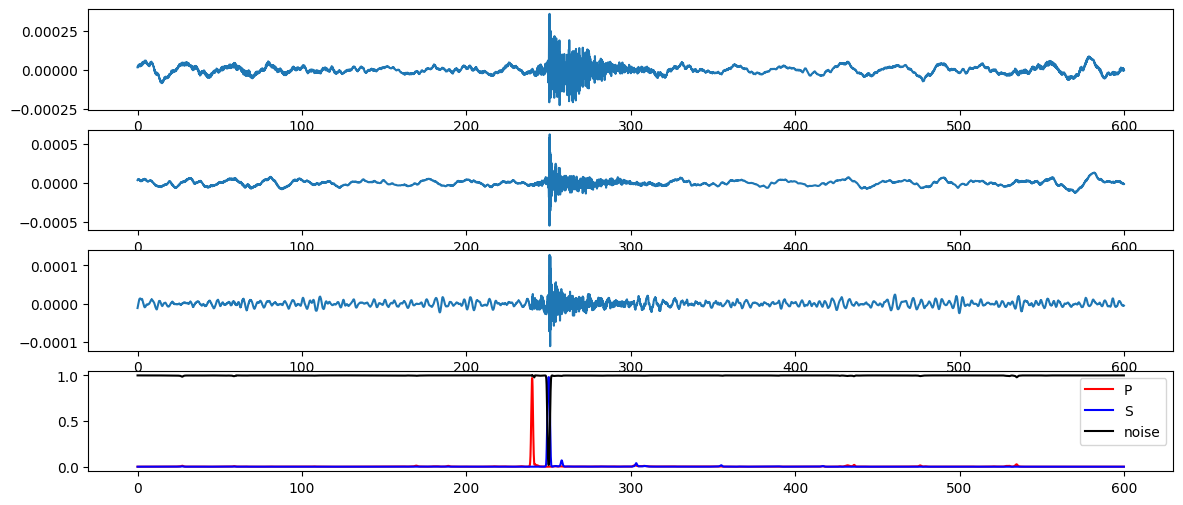

In [26]:
def show_response(request,response):
    res=response.json()
    print(res["id"])
    print(res["arrivals"])

    # plot
    fig,ax=plt.subplots(4,1,figsize=(14,6))
    # plot waveform
    dt_s=0.025
    x=np.arange(0,len(request["waveform"][0]))*dt_s
    ax[0].plot(x,request["waveform"][0])
    ax[1].plot(x,request["waveform"][1])
    ax[2].plot(x,request["waveform"][2])
    colors={
        "noise":"black",
        "P":"red",
        "S":"blue",
    }
    # plot possibility
    for phase in res["prediction"].keys():
        ax[3].plot(x,res["prediction"][phase],label=phase,color=colors[phase])
    ax[3].legend()
    # # plot arrival
    # for phase in res["arrivals"][0].keys():
    #     ax[3].scatter(np.array(res["arrivals"][0][phase])*dt_s,res["amps"][0][phase],label=phase,color=colors[phase])
    # ax[3].legend()
    plt.show()


show_response(request_body,response)